## **Data Preparation**

In [277]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
import os
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import LabelEncoder
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [278]:
data = pd.read_excel(r'C:\Users\Stiven Gabriel\Documents\data.xlsx')
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach  \
0   63    male      asymptomatic       145   233    1        0      150   
1   37    male  non-anginal pain       130   250    0        1      187   
2   41  female   atypical angina       130   204    0        0      172   
3   56    male   atypical angina       120   236    0        1      178   
4   57  female    typical angina       120   354    0        1      163   

   exang  oldpeak        slope  ca          thal  target  
0      0       23    upsloping   0        normal       1  
1      0       35    upsloping   0  fixed defect       1  
2      0       14  downsloping   0  fixed defect       1  
3      0        8  downsloping   0  fixed defect       1  
4      1        6  downsloping   0  fixed defect       1

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    int64 
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    int64 
 4   chol      303 non-null    int64 
 5   fbs       303 non-null    int64 
 6   restecg   303 non-null    int64 
 7   thalach   303 non-null    int64 
 8   exang     303 non-null    int64 
 9   oldpeak   303 non-null    int64 
 10  slope     303 non-null    object
 11  ca        303 non-null    int64 
 12  thal      301 non-null    object
 13  target    303 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 33.3+ KB


In [280]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **EDA**

### Data Duplication

In [281]:
data.duplicated().sum()

1

Sebelumnya telah terdeteksi bahwa ada satu data yang terduplikasi, maka itu dilakukan salah satu teknik Data Cleaning yaitu Dropping.

In [282]:
# Menghapus baris duplikat berdasarkan semua kolom
data1 = data.drop_duplicates()

# Menulis data ke file CSV
data1.to_csv('data_deduplicated.csv')

In [283]:
# Memeriksa kembali jumlah data yang terduplikasi
data1.duplicated().sum()

0

### Missing Value

In [284]:
data1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

Sebelumnya telah terdeteksi bahwa ada satu data yang hilang, maka itu dilakukan salah satu teknik Data Cleaning yaitu Imputation.

In [285]:
data1['thal'] = data1['thal'].fillna(method='bfill')

C:\Users\Stiven Gabriel\AppData\Local\Temp\ipykernel_15972\4068380499.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['thal'] = data1['thal'].fillna(method='bfill')
C:\Users\Stiven Gabriel\AppData\Local\Temp\ipykernel_15972\4068380499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['thal'] = data1['thal'].fillna(method='bfill')


Dilakukan kembali pengecekan untuk memeriksa Missing Value

In [286]:
data1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berikut dilakukan analisis data yang dimulai dari analisis univariat dan multivariat. Sebelum itu, bagi data menjadi dua jenis data, yaitu data kategorik dan data numerik. 

Sebagai catatan, beberapa data kategorik seperti fbs, restecg, exang, dan target sudah diubah menjadi data numerik dengan keterangan setiap value yang berbeda.

In [340]:
categorical_features = ['sex', 'cp', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target']

### Analisis Univariat

a. Data Kategorik

        Jumlah sampel  Persentase
sex                              
male              206        68.2
female             96        31.8


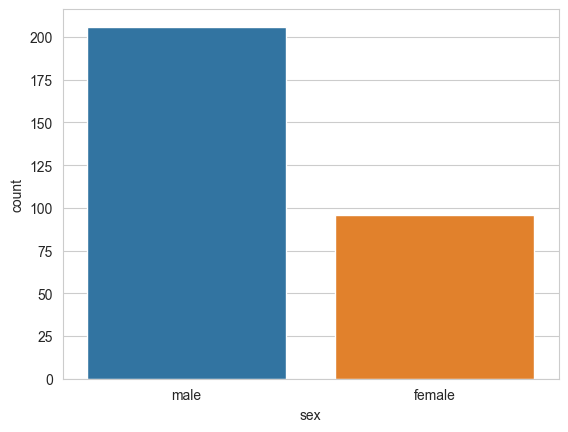

                  Jumlah sampel  Persentase
cp                                         
typical angina              143        47.4
non-anginal pain             86        28.5
atypical angina              50        16.6
asymptomatic                 23         7.6


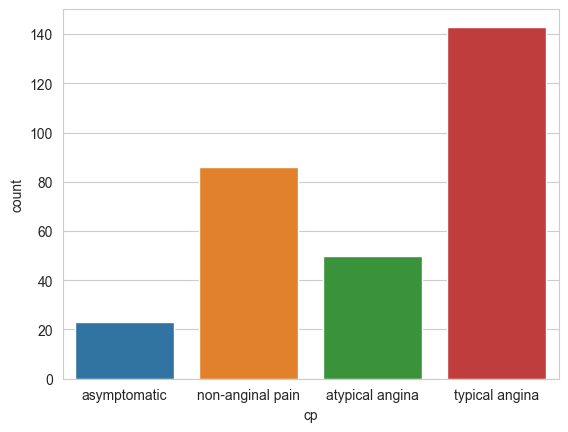

             Jumlah sampel  Persentase
slope                                 
downsloping            141        46.7
flat                   140        46.4
upsloping               21         7.0


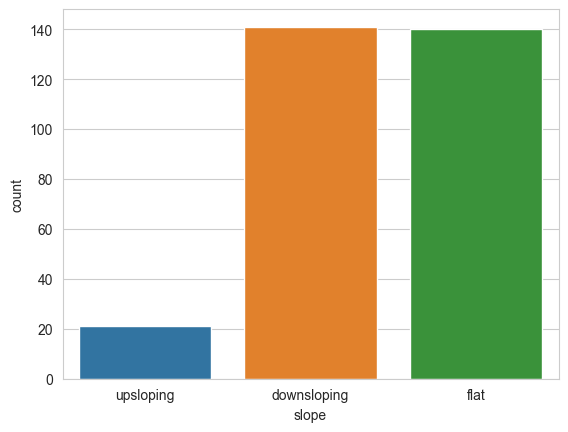

                   Jumlah sampel  Persentase
thal                                        
fixed defect                 166        55.0
reversable defect            117        38.7
normal                        19         6.3


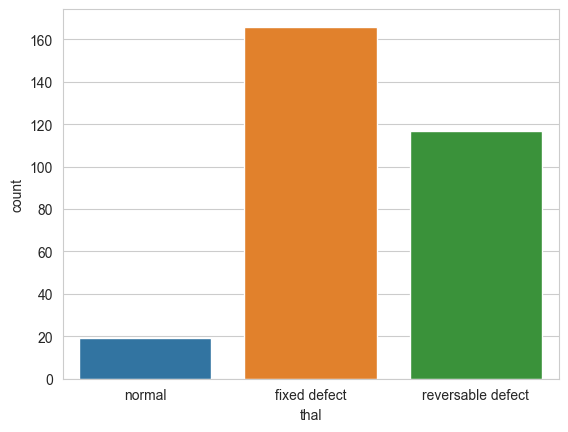

In [341]:
# Looping untuk setiap variabel kategorikal
for feature in categorical_features:
  # Hitung jumlah sampel untuk setiap kategori
  count = data1[feature].value_counts()
  # Hitung persentase untuk setiap kategori
  percent = 100 * data1[feature].value_counts(normalize=True)
  # Buat DataFrame untuk menyimpan hasil
  df = pd.DataFrame({"Jumlah sampel": count, "Persentase": percent.round(1)})
  # Cetak DataFrame
  print(df.to_string())

  # Plot pie chart untuk setiap variabel
  sns.countplot(x=feature, data=data1)
  plt.show()

b. Data Numerik

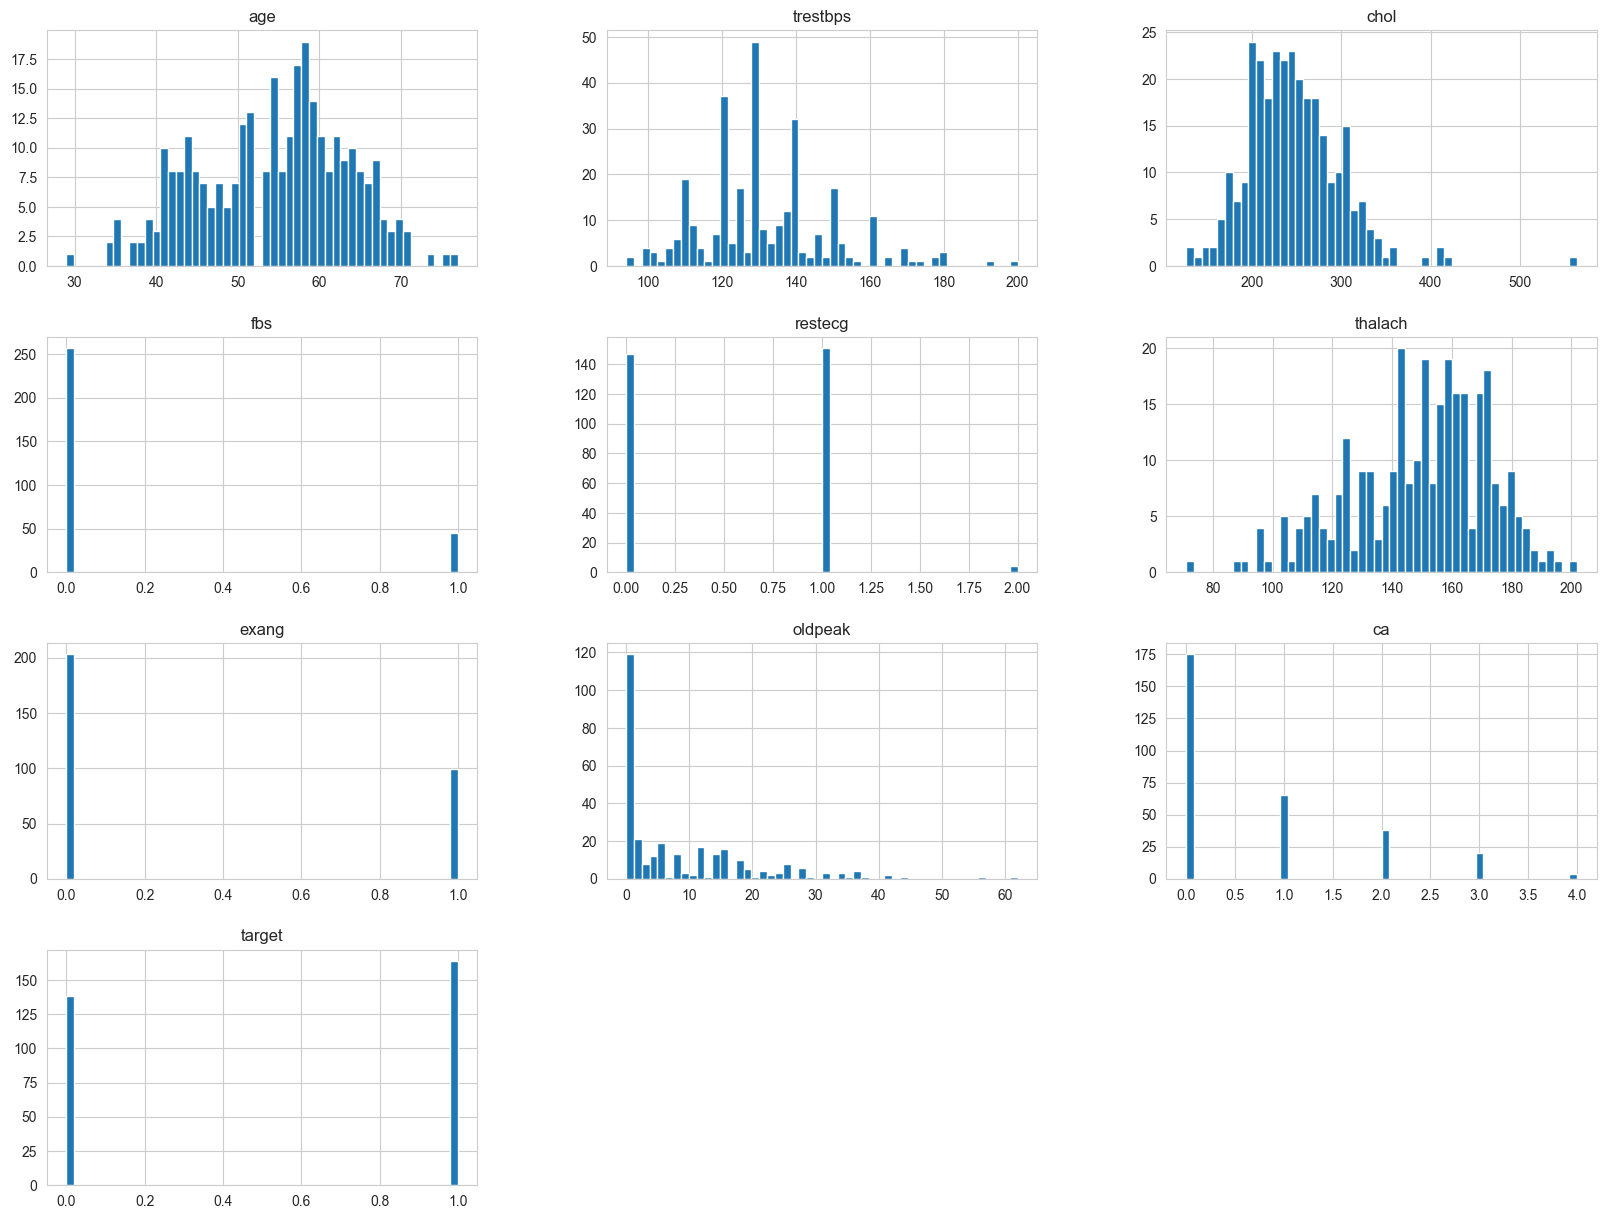

In [342]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

### Analisis Bivariat

Analisis Bivariat dapat dilakukan pada Data Kategorik untuk dataset ini.

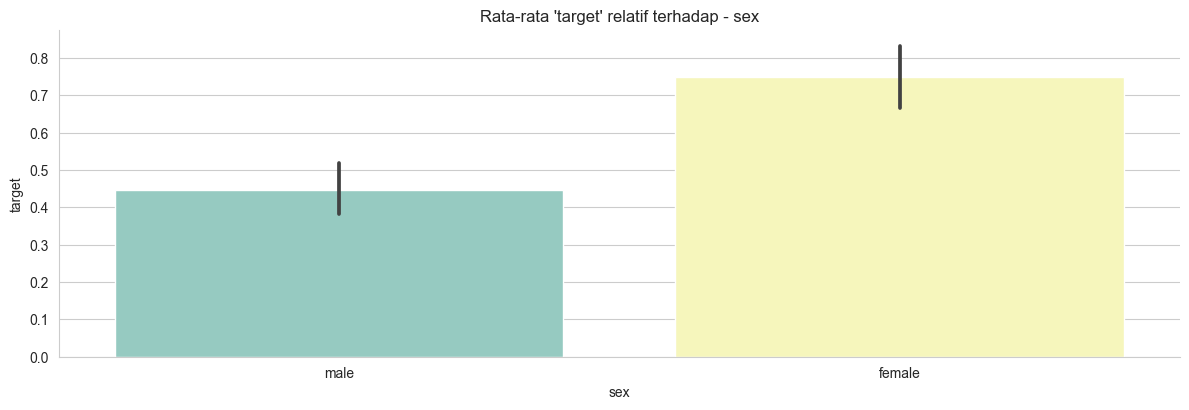

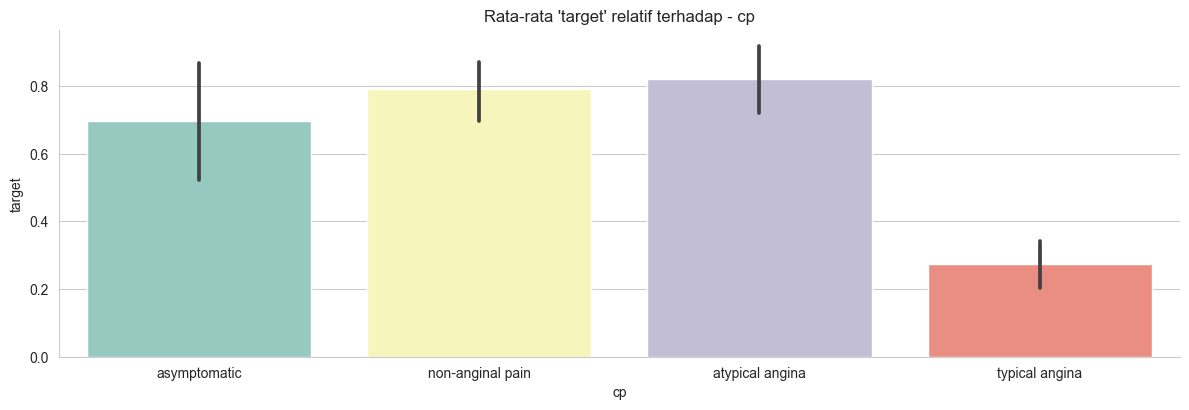

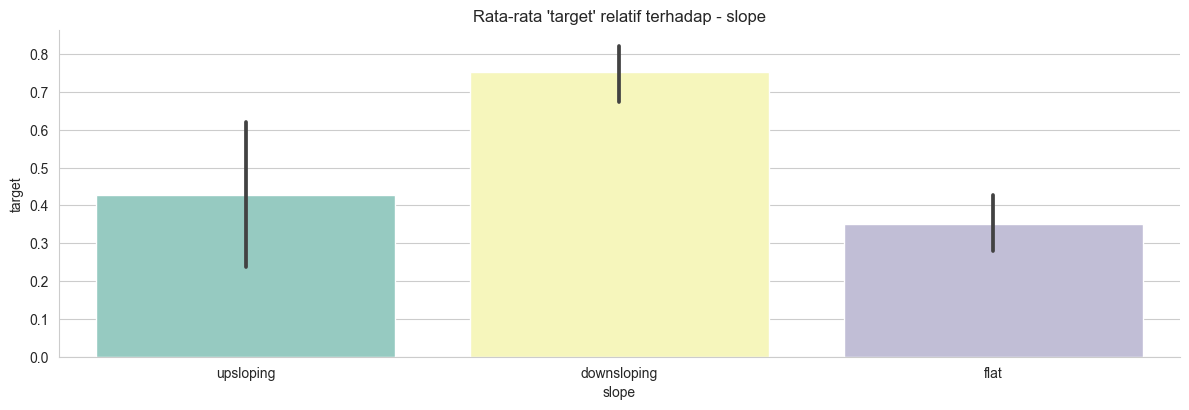

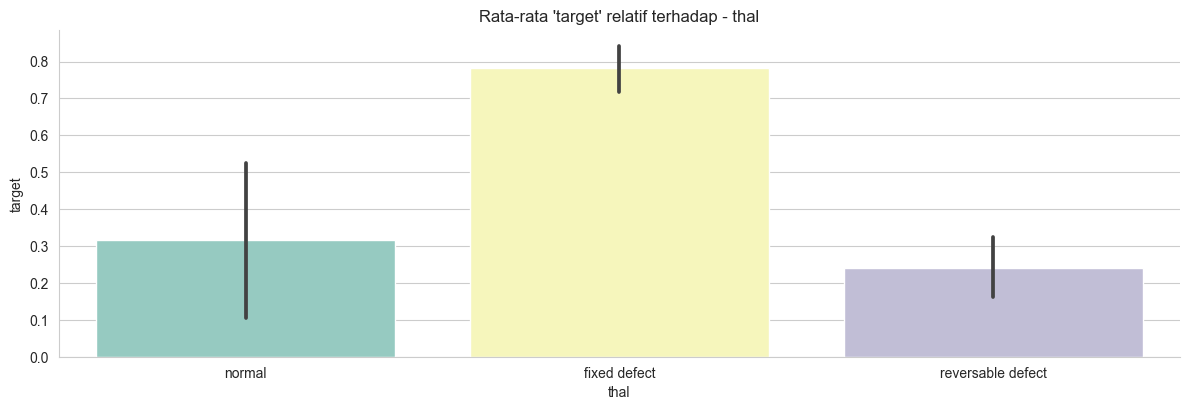

In [343]:
cat_features = data1.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='target', kind="bar", dodge=False, height = 4, aspect = 3,  data=data1, palette="Set3")
  plt.title("Rata-rata 'target' relatif terhadap - {}".format(col))

### Analisis Multivariat

Analisis Multivariat dapat dilakukan pada Data Numerik

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

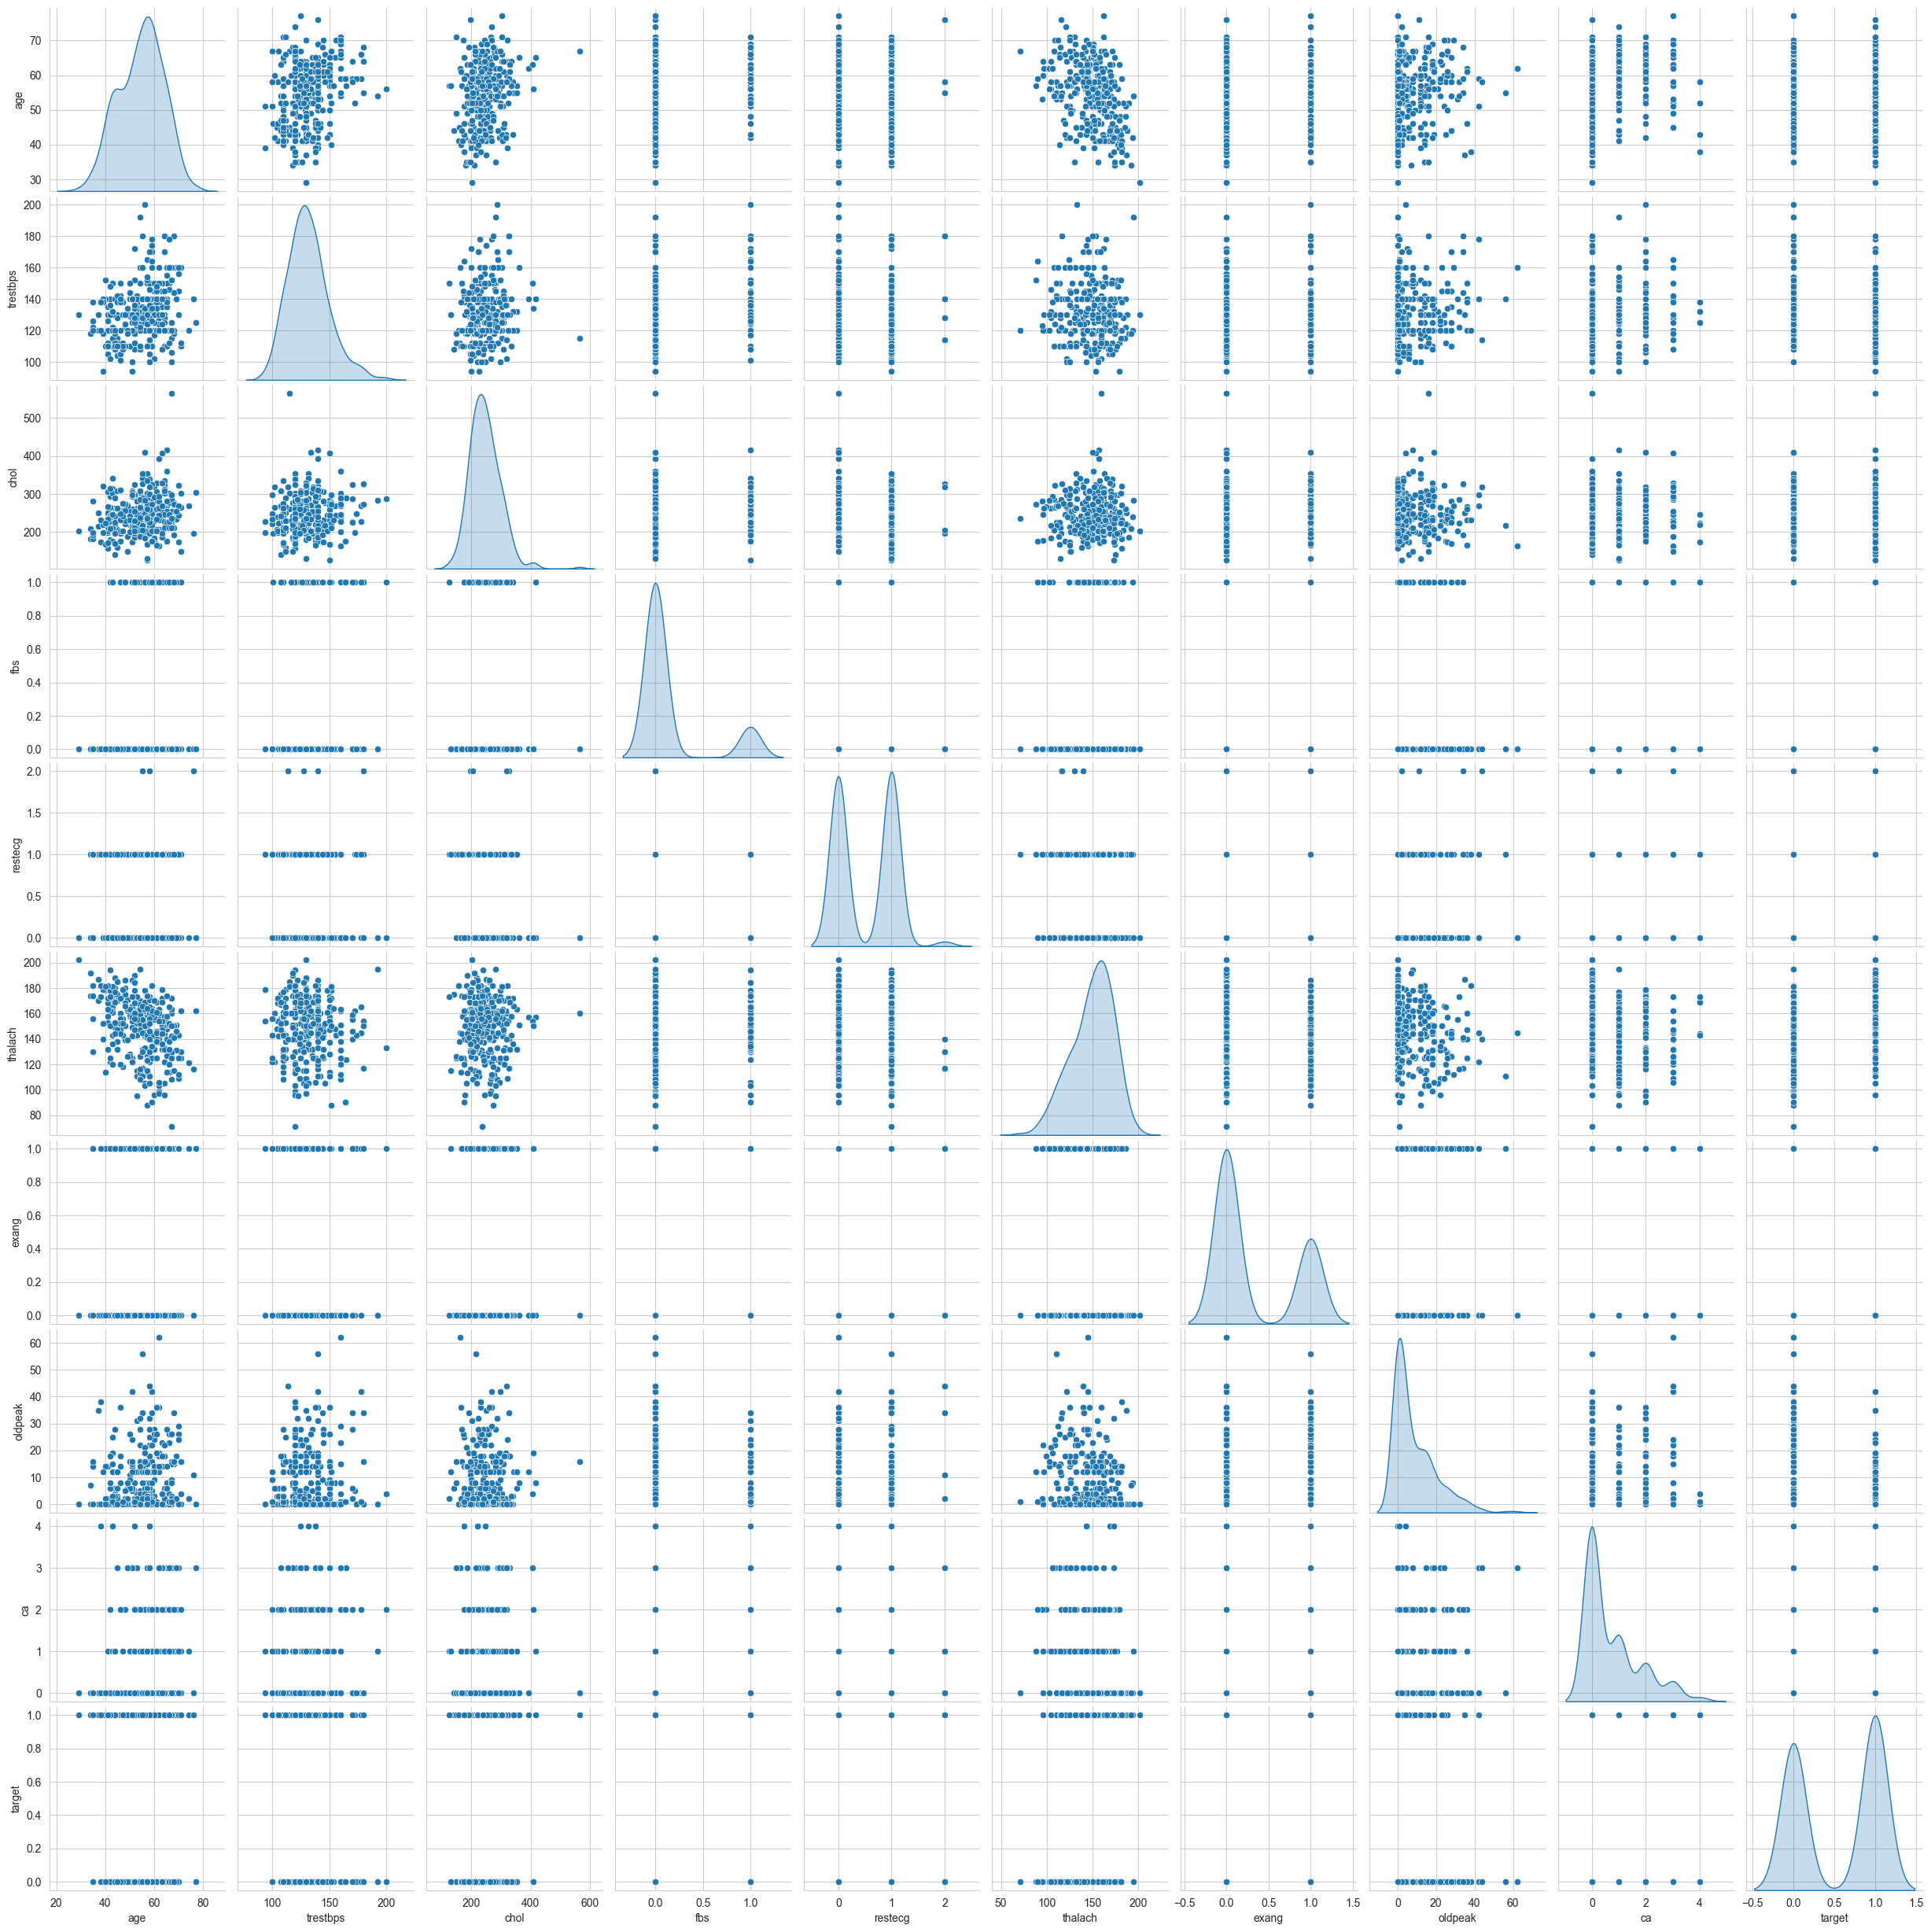

In [344]:
sns.pairplot(data1, diag_kind = 'kde')

Setelah itu, dilakukan analisis korelasi dari setiap variabel numerik.

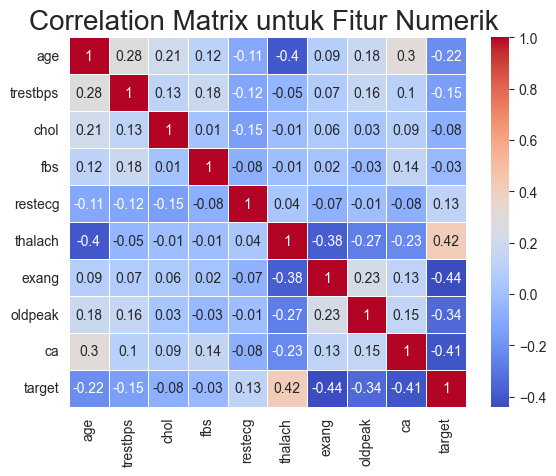

In [345]:
# Buat dataframe baru yang hanya berisi variabel numerik
numerical_variable = data1[numerical_features]

# Hitung matriks korelasi untuk dataframe numerik
correlation_matrix = numerical_variable.corr().round(2)

# Plot matriks korelasi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

## **Model Preparation**

**Dilakukan terlebih dahulu pemisahan kolom 'target' dari dataset untuk merubahnya menjadi variabel y. Setelah itu, dilakukan pemisahan data menjadi set untuk train dan set untuk test**

In [346]:
y = data1["target"]
X = data1.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Sebelum melakukan scaling, perlu dilakukan encoding pada data kategorikal menjadi data numerikal

In [347]:
from sklearn.preprocessing import OneHotEncoder

# Buat OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Ubah data kategorikal menjadi data numerik
X_train_encoded = ohe.fit_transform(X_train[['sex', 'cp', 'slope', 'thal', 'fbs', 'restecg','ca','exang']])
X_test_encoded = ohe.transform(X_test[['sex', 'cp', 'slope', 'thal', 'fbs', 'restecg', 'ca','exang']])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [348]:
from sklearn.preprocessing import StandardScaler

# Buat StandardScaler
scaler = StandardScaler()

# Skalakan data numerik
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


## **ML models**

Terdapat beberapa algoritma Machine Learning yang berbeda untuk menemukan algoritma yang memprediksi secara akurat.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. Decision Tree
6. Support Vector Machine


In [349]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[24  3]
 [ 4 30]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [350]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
nbpred = nb.predict(X_test_scaled)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 5 29]]


Accuracy of Naive Bayes model: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [351]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[22  5]
 [ 2 32]]


Accuracy of Random Forest: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [352]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train_scaled, y_train)
xgb_predicted = xgb.predict(X_test_scaled)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 3 24]
 [ 0 34]]


Accuracy of Extreme Gradient Boost: 60.65573770491803 

              precision    recall  f1-score   support

           0       1.00      0.11      0.20        27
           1       0.59      1.00      0.74        34

    accuracy                           0.61        61
   macro avg       0.79      0.56      0.47        61
weighted avg       0.77      0.61      0.50        61



In [353]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train_scaled, y_train)
dt_predicted = dt.predict(X_test_scaled)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[20  7]
 [ 2 32]]


Accuracy of DecisionTreeClassifier: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [354]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train_scaled, y_train)
svc_predicted = svc.predict(X_test_scaled)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[25  2]
 [ 6 28]]


Accuracy of Support Vector Classifier: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.93      0.82      0.87        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



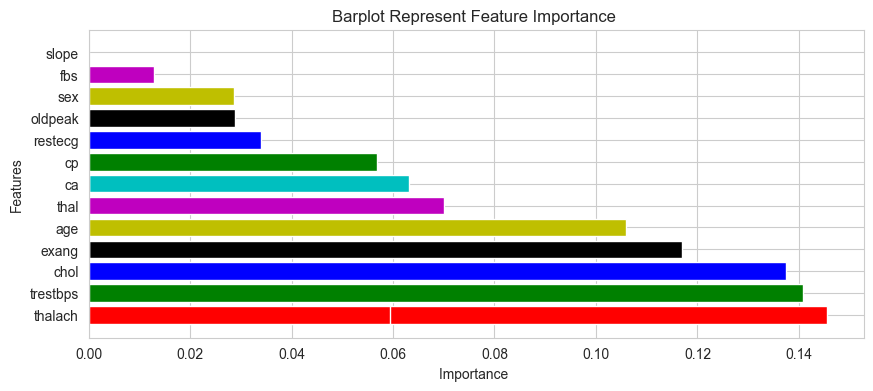

In [355]:
# Assuming xgb.feature_importances_ returns a list or array
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','thalach', 'ca','exang']
importance_values = xgb.feature_importances_

# Sort features by importance
sorted_idx = importance_values.argsort()
feature_names = [feature_names[i] for i in sorted_idx[::-1]]
importance_values = [importance_values[i] for i in sorted_idx[::-1]]

# Create the pandas DataFrame
imp_feature = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values})

plt.figure(figsize=(10, 4))
plt.title("Barplot Represent Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

# Ensure both arrays have the same length (important)
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=my_colors)
plt.show()

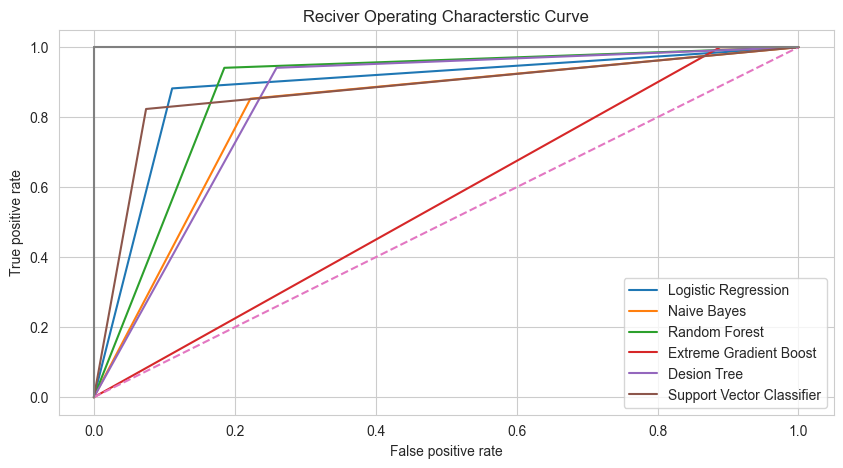

In [356]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## **Model Evaluation**

Dilakukan Evaluasi untuk setiap Model ML dengan dua cara yaitu dengan mengetahui tingkat akurasi dari setiap model dan memeriksa metriks juga melakukan prediksi dari model yang sudah di ensemble dan model yang tidak di ensemle.

In [357]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  88.524590
1             Naive Bayes  81.967213
2           Random Forest  88.524590
3  Extreme Gradient Boost  60.655738
4           Decision Tree  85.245902
5  Support Vector Machine  86.885246

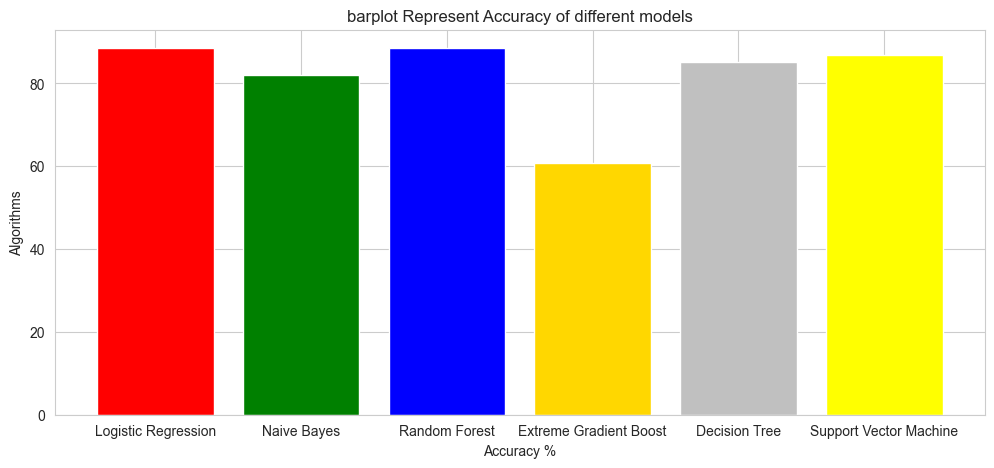

In [358]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Berdasarkan perolehan tingkat akurasi dan barplot akurasi untuk setiap model diatas menyatakan bahwa model Logistic Regression, Random Forest, dan Support Vector Machine memiliki tingkat akurasi paling tinggi. Maka itu, dilakukan ensemble terhadap ketiga Model tersebut untuk membentuk model baru yang lebih bagus.

In [359]:
scv=StackingCVClassifier(classifiers=[lr,rf,svc],meta_classifier= LogisticRegression(),random_state=42)
scv.fit(X_train_scaled,y_train)
scv_predicted = scv.predict(X_test_scaled)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[24  3]
 [ 2 32]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.91      0.94      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [360]:
def metrics(name,key,arg):
    print('Name of the model: ',name)
    print('R^2 of the model:',r2_score(key,arg))
    print('MSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))
    print('......')

In [361]:
y_SCV = scv.predict(X_test_scaled)
y_NB = nb.predict(X_test_scaled)
y_XGB = xgb.predict(X_test_scaled)
y_DT = dt.predict(X_test_scaled)


metrics('Performa Model Naive Bayes', y_test, y_NB)
metrics('Performa Model Extreme Gradient Boost', y_test, y_XGB)
metrics('Performa Model Decision Tree', y_test, y_DT)
metrics('Performa Model Support Vector Machine', y_test, y_SCV)

Name of the model:  Performa Model Naive Bayes
R^2 of the model: 0.2690631808278867
MSE of the model: 0.4246502900652006
MAE of the model: 0.18032786885245902
......
Name of the model:  Performa Model Extreme Gradient Boost
R^2 of the model: -0.5947712418300652
MSE of the model: 0.62725004818718
MAE of the model: 0.39344262295081966
......
Name of the model:  Performa Model Decision Tree
R^2 of the model: 0.4019607843137255
MSE of the model: 0.3841106397986879
MAE of the model: 0.14754098360655737
......
Name of the model:  Performa Model Support Vector Machine
R^2 of the model: 0.6677559912854031
MSE of the model: 0.2862991671569341
MAE of the model: 0.08196721311475409
......


In [362]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['NB','XGB','DT','SCV'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'NB': nb, 'XGB': xgb, 'DT': dt, 'SCV': scv}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_scaled))/1e-3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_scaled))/1e-3

# Panggil mse
mse

train        test
NB   178.423237  180.327869
XGB  373.443983  393.442623
DT   124.481328  147.540984
SCV  107.883817   81.967213

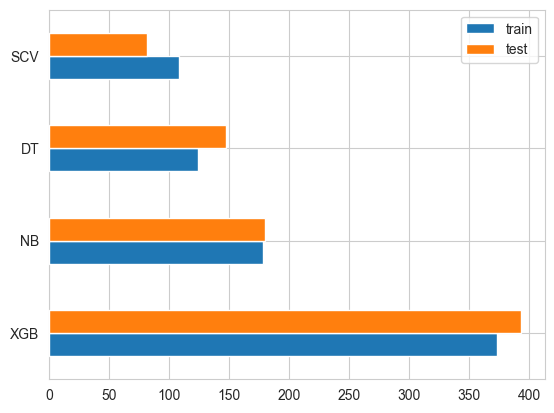

In [363]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [364]:
prediksi = X_test_scaled[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

y_true  prediksi_NB  prediksi_XGB  prediksi_DT  prediksi_SCV
226       0            1             1            0             0

Berdasarkan hasil prediksi diatas, ML Models Decision Tree dan Ensembled Model (SCV) memiliki hasil prediksi yang paling dekat dengan nilai y_true

Berdasarkan hasil evaluasi ML Models dengan tingkat akurasi dan melihat hasil prediksi dari setiap ML Models, dapat disimpulkan bahwa prediksi Ensembled Model-lah yang paling cocok untuk digunakan